## Proposal Report : Power Price Prediction

### Contributors

- Arjun Radhakrishnan
- Sneha Sunil
- Gaoxiang Wang
- Mehdi Naji

### Executive Summary 

Our proposed business solution aims to build an interpretable and explainable data science product ready to be deployed on the cloud for power price prediction in Alberta Energy Market. Our solution can enable organizations to make informed decisions about their energy purchases by forecasting hourly energy prices in advance, along with confidence intervals. The solution will also address the lack of interpretability and explainability in the current system[[1]](https://aeso-portal.powerappsportals.com/data-portal-dashboard/). This product will be accompanied by an intuitive tableau dashboard showcasing relevant visualizations to enable stakeholders to monitor real-time hourly predictions with a margin of error.

### Introduction

Over the past few decades, the electricity markets have transformed from regulated to competitive and deregulated. Alberta's electricity market started deregulating in 1996[[2]](https://www.aeso.ca/aeso/understanding-electricity-in-alberta/continuing-education/guide-to-understanding-albertas-electricity-market/), resulting in highly volatile and uncertain power prices. Many organizations purchase large quantities of energy on demand and rely on energy forecasts to determine their costs in advance. Power price prediction can also be critical for many power generation companies to make effective decisions toward maximizing their profit, determining pricing strategies in the market, and scheduling technical maintenance periods.
The current energy forecasts only provide a short-term coverage of 6 hours, which is volatile and lacks interpretation or model visibility. To reduce their expenses, companies could plan and potentially explore alternative energy options if they have access to accurate forecasts which covers a longer window and is also interpretable and explainable. This project aims to help businesses by providing cost analysis and forecasting hourly energy prices 12 hours in advance. Our objective is to empower companies to plan for alternative energy solutions, such as sourcing energy from elsewhere, purchasing at different times, or even developing their own energy generation systems. 

The project aims to deliver three products: a model pipeline, a tableau dashboard, and a comprehensive report. The model pipeline will be designed to automate the flow of tasks that includes data wrangling, exploratory data analysis, feature engineering, modeling, and forecasting seamlessly. The dashboard will showcase real-time market price predictions and data visualizations that are interactive and informative for the audience. The report will document information about the electricity market mechanism in Alberta, along with an extensive overview of the modeling strategies and evaluation metrics that were used.

### Data Science Techniques

AESO is an operator service in Alberta that is responsible for managing the power distribution system for the province. This organization publishes relevant data which is used for the computation of market pool price, excluding some sensitive details. They have also published APIs using which we can access near to real-time data (with a delay of approx. 1 hour) programmatically like price, internal load, etc. However, the values of some of the features are not available in real-time, which needs to be analyzed based on the historical data alone. Hence the primary sources of data would be the open-source datasets [[3]](https://public.tableau.com/app/profile/market.analytics/viz/AnnualStatistics_16161854228350/Introduction) and the APIs [[4]](https://api.aeso.ca/web/api/ets). For the exploratory data analysis, we will be using the historical data that is obtained from the Tableau dashboard hosted by AESO. The current datasets contain ~72,000 rows and ~50 features spanning from 2015 – 2023. The main target that we are forecasting 12 hours in advance is the **power pool price** (CAD) which is the balanced average power price per hour for the Alberta province and is finalized by AESO based on supply and demand. It is capped between 0 and 1000 to ensure that the Alberta electricity market is stable and fair. Some of the main features that could have a significant impact on the price prediction are given below –

- **Alberta Internal Load** - This feature represents the total amount of power load demand within Alberta. The unit of AIL is MegaWatts (MW).
 - **Hourly Profile** - A categorical variable with two values OFF PEAK and ON PEAK. This indicates whether there is a high/low demand for power at the given hour.
- **Region-wise system load** - This represents the total electric power that is distributed to consumers in Alberta in various regions. Alberta is divided into six regions - Calgary, Edmonton, Central, Northeast, South, and Northwest.
- **Season** - A categorical variable of two values - SUMMER and WINTER. This indicates the season that the given hour belongs to.

Additional features such as power generation and weather data may also be included in the later iterative stages to understand the difference in prices in various regions in Alberta. The stakeholders would be the power buyers or any other industry clients who are interested in making informed decisions about their energy purchases. This product will assist organizations to plan for alternative power source options like generating power on their own on their site. The metrics used in this project will be useful for them to evaluate the performance of the forecasting model.

According to our client's consideration, over-prediction and under-prediction are equally detrimental, and therefore, we will consider Root Mean Square Error (RMSE) as our evaluation metric, which is commonly used in stock market price prediction and penalizes both types of errors equally.

To predict market prices, several approaches can be used, such as time series analysis, machine learning, and statistical modeling. One possible initial approach is to fit a univariate time-series SARIMA model of the pool price to estimate the target. This approach captures the seasonality, trend, and correlations between lags and is based solely on historical data of the pool price and does not take into account other factors.

Another possible approach is a two-step forecasting method, which involves using SARIMA or Naïve time series models like ETS to forecast the input features for the next 12 hours. These input features may include factors such as power demand and supply. Once the input features have been predicted, regression models such as a random forest regressor can be used to forecast the price.

Alternatively, we could try using a one-step forecasting approach which involves predicting the future price directly using past values of input features and target price. This approach can be used in conjunction with machine learning models such as random forest regressor, where the predictors could be the previous 24-hour data of all input features and the price.

Since our client prioritizes interpretability over accuracy, we will focus on models that are easy to interpret. Our objective is to extend the forecasting window from six hours to twelve hours while maintaining interpretability and explainability as our primary success criterion.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.express as px

warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "lines.linewidth": 2})

df = pd.read_csv(
    "../../data/processed/ail_price.csv", parse_dates=["date"], index_col="date"
)
df = df.sort_values(by="date")


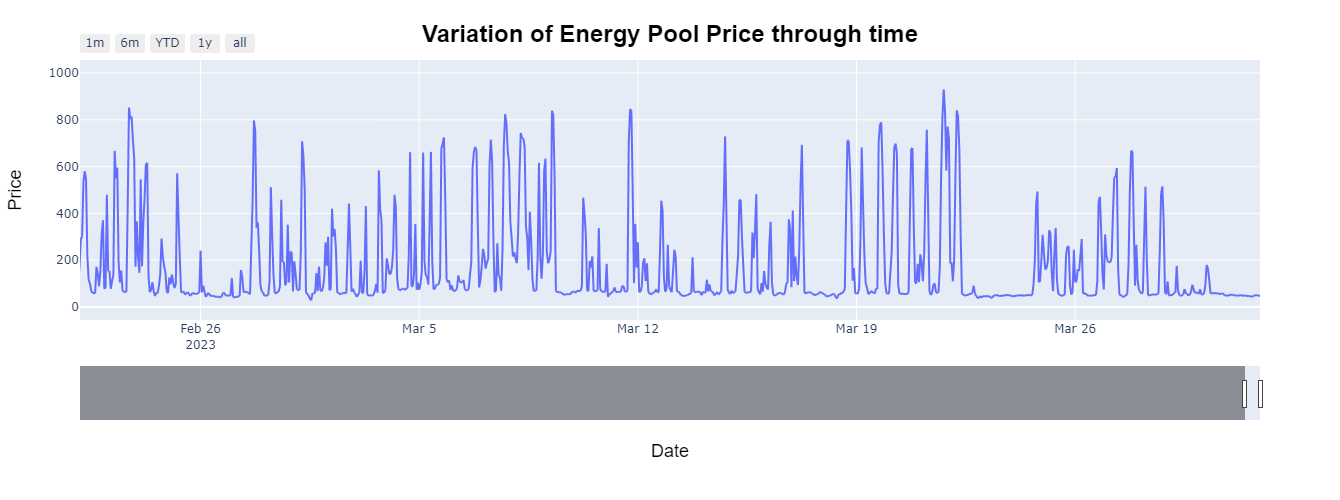

In [2]:
fig = px.line(df, y="price")
fig.update_layout(
    title={
        "text": "Energy Pool Price Variation Over Time",
        "font": {"size": 18, "family": "Arial", "color": "black"},
        "y": 0.97,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis_title={
        "text": "Date",
        "font": {"size": 18, "family": "Arial", "color": "black"},
    },
    yaxis_title={
        "text": "Price",
        "font": {"size": 18, "family": "Arial", "color": "black"},
    },
    xaxis_range=["2023-03-01", "2023-03-31"],
    height=500,
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all"),
            ]
        )
    ),
)
fig.show()


**Plot 1: Variation of Energy pool price through time** The interactive plot displays Energy pool price variation for March 2023. Click Autoscale to view price patterns from 2015-2023 and Reset axes to return to the focussed view.

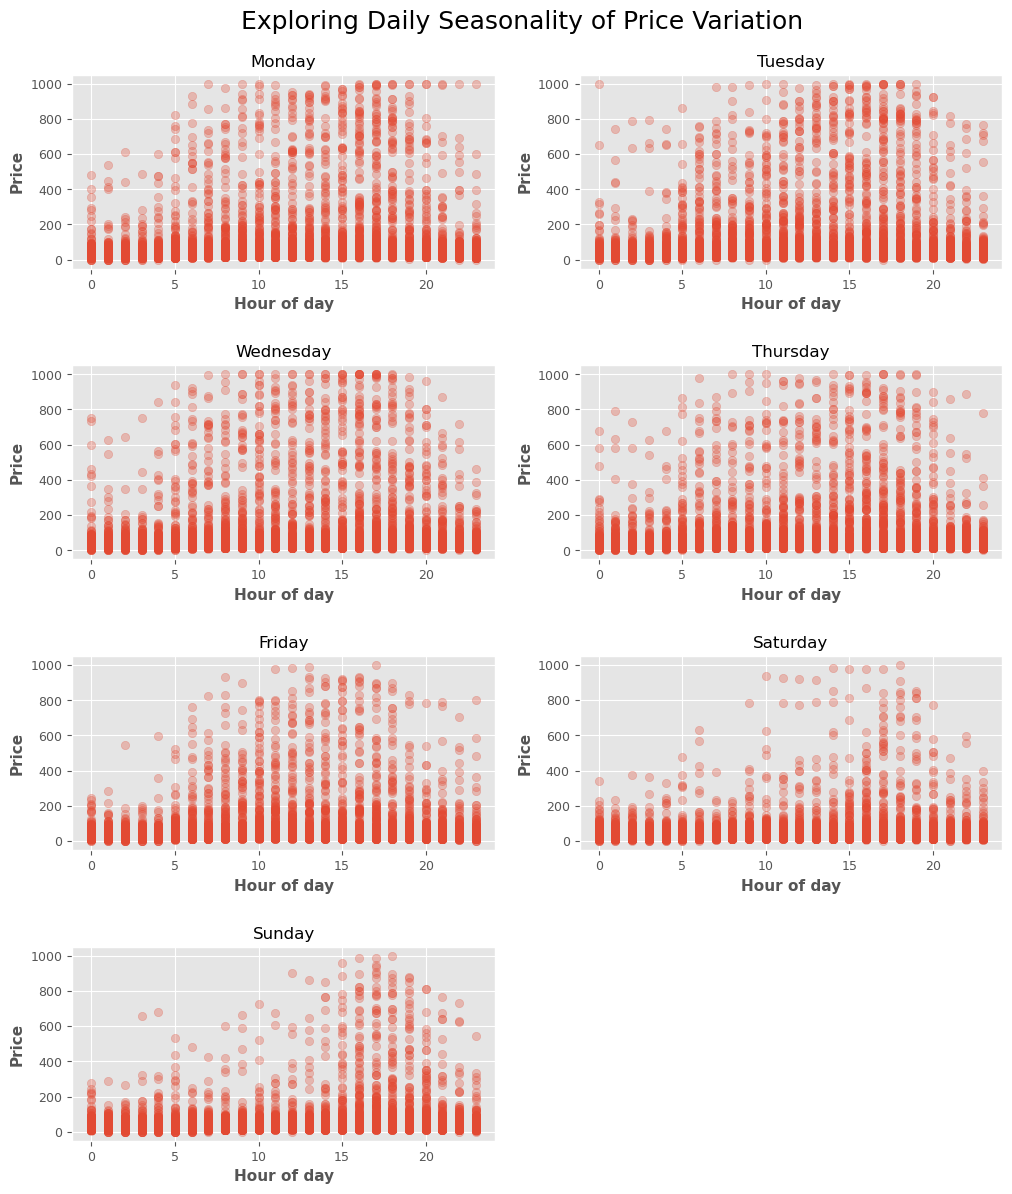

In [3]:
# Define data and plot settings
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 13))
plt.subplots_adjust(hspace=0.5, top=0.93)

# Loop through days of the week and plot data
for i, ax in enumerate(axs.flat):
    if i > 6:
        break

    day = df[df.index.dayofweek == i]
    ax.scatter(day.index.hour, day["price"], alpha=0.3)
    ax.tick_params(axis="both", which="major", labelsize=9)
    ax.set_xlabel("Hour of day", fontsize=11)
    ax.set_ylabel("Price", fontsize=11)
    ax.set_title(f'{day.index[0].strftime("%A")}', fontsize=12)

# Add overall title
fig.suptitle("Exploring Daily Seasonality of Price Variation", fontsize=18)

# Remove empty subplot
plt.delaxes(axs[3][1])

# Show plot
plt.show()

**Plot 2: Exploring Daily Seasonality of Price Variation** The daily plots reveal a seasonal pattern in energy prices. On weekdays, prices are higher during working hours and lower during off working hours. Weekends show higher prices in the evenings. This behavior is confirmed by autocorrelation function plots, indicating clear daily seasonality.

<Figure size 1000x800 with 0 Axes>

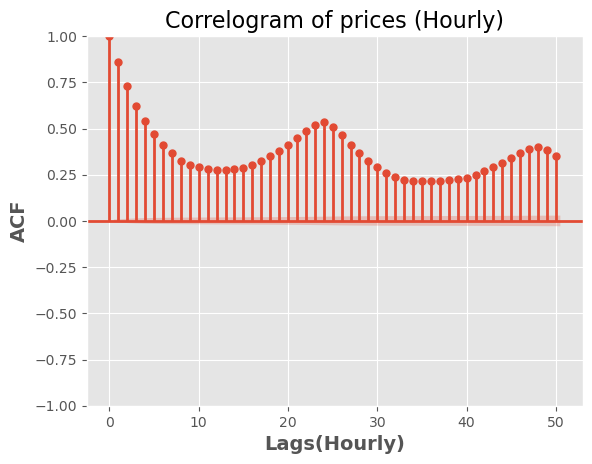

In [4]:
fig = plt.figure(figsize=(10, 8))

# ACF plot
plot_acf(df["price"], lags=50)
plt.title("Correlogram of prices (Hourly)", fontsize=16)
plt.xlabel("Lags(Hourly)", fontsize=14)
plt.ylabel("ACF", fontsize=14)
plt.tick_params(axis="both", which="major", labelsize=10)

plt.show()


**Plot 3: Correlogram of prices (Hourly)** This is an autocorrelation function plot with 50 lags for the pool price. We can clearly see a daily seasonality in this plot.  
`Note` : ACF plot depicts the correlation between the price and its lagged values

### Timeline

The project timeline is designed to ensure timely completion of the deliverables. The first two weeks are allocated for proposal preparation, problem and data understanding, and initial exploratory data analysis. The primary workload will be during the four middle weeks, with a focus on feature engineering, model design, testing, and dashboard development following iterative and agile practices. Week 7 is allocated for product deployment, model refinement, bug fixing, and report finalization. Finally, week 8 is for wrapping up the project, final presentation preparation, and ensuring that all deliverables are completed with high quality. 

![TimeLine](timeline.png)

## References

[AESO real time dashboard[1]](https://aeso-portal.powerappsportals.com/data-portal-dashboard/)

[Alberta's electrivity market[2]](https://www.aeso.ca/aeso/understanding-electricity-in-alberta/continuing-education/guide-to-understanding-albertas-electricity-market/)

[Tableau dashboard[3]](https://public.tableau.com/app/profile/market.analytics/viz/AnnualStatistics_16161854228350/Introduction)

[AESO APIs[4]](https://api.aeso.ca/web/api/ets)

[AESO portal](http://ets.aeso.ca/)

[State of electricity market](https://www.albertamsa.ca/assets/Documents/MSA-State-of-Mkt-Directions-120620.pdf)

[AESO Market Stat Report](https://www.aeso.ca/assets/Uploads/market-and-system-reporting/2022_Annual_Market_Stats_Final.pdf)